<a href="https://colab.research.google.com/github/nshaganti/nshaganti-estimating-the-profitability-of-discounts-lp/blob/main/Getting_Familiar_with_the_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/nshaganti/nshaganti-estimating-the-profitability-of-discounts-lp.git

Cloning into 'nshaganti-estimating-the-profitability-of-discounts-lp'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 522.30 KiB | 4.75 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [12]:
import os
repo = 'nshaganti-estimating-the-profitability-of-discounts-lp'
if os.getcwd().split("/")[-1] == repo:
  print("Already in the correct directory")
else:
  os.chdir(repo)
  print(f"Changed working directory to: {repo}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Already in the correct directory


In [13]:
data = pd.read_csv("non_rand_discount.csv", delimiter=";")

In [14]:
data.shape

(15000, 45)

In [15]:
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [16]:
# understand the inferred data types
data.dtypes

,0
spend_1m_baby,int64
spend_2m_baby,int64
spend_3m_baby,int64
spend_4m_baby,int64
spend_5m_baby,int64
spend_6m_baby,float64
spend_1m_clothes,int64
spend_2m_clothes,float64
spend_3m_clothes,float64
spend_4m_clothes,float64


In [20]:
# parse the discount
data["discount"] = (data["discount"].str.split(" ").str[-1]).astype(float)

In [21]:
# check for any missing data
data.isna().sum()

,0
spend_1m_baby,0
spend_2m_baby,0
spend_3m_baby,0
spend_4m_baby,0
spend_5m_baby,0
spend_6m_baby,0
spend_1m_clothes,0
spend_2m_clothes,0
spend_3m_clothes,0
spend_4m_clothes,0


In [23]:
data["profits"] = 0.05 * data["sales"] - data["discount"]

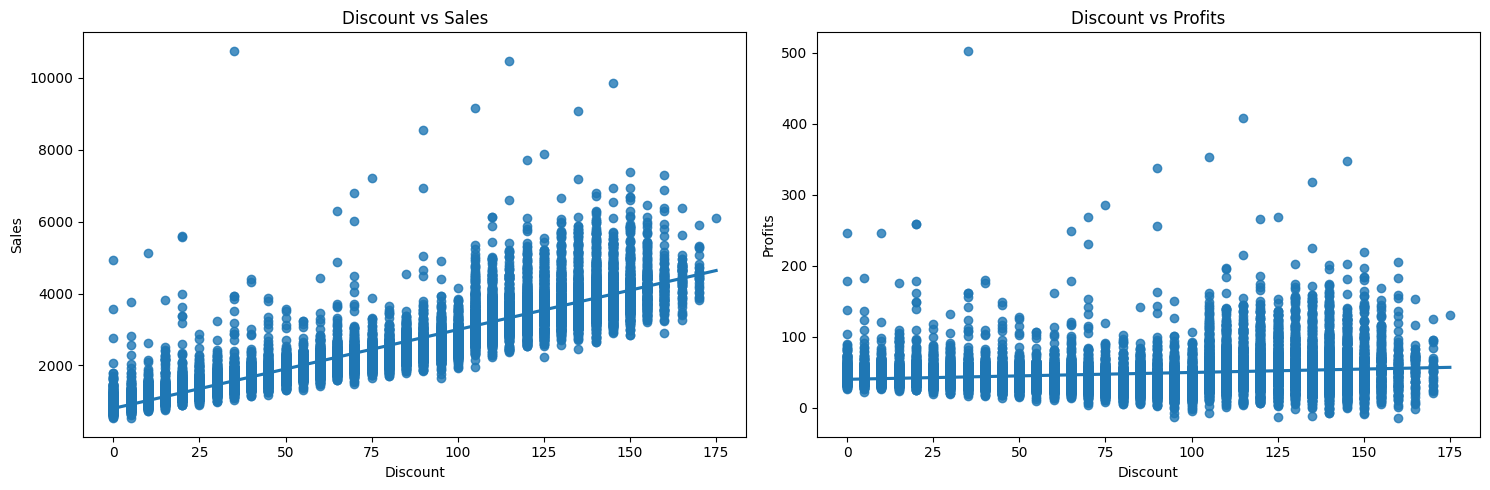

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Discount vs Sales
sns.regplot(x='discount', y='sales', data=data, ax=axes[0])
axes[0].set_title('Discount vs Sales')
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Sales')

# Plot 2: Discount vs Profits
sns.regplot(x='discount', y='profits', data=data, ax=axes[1])
axes[1].set_title('Discount vs Profits')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Profits')

plt.tight_layout()
plt.show()

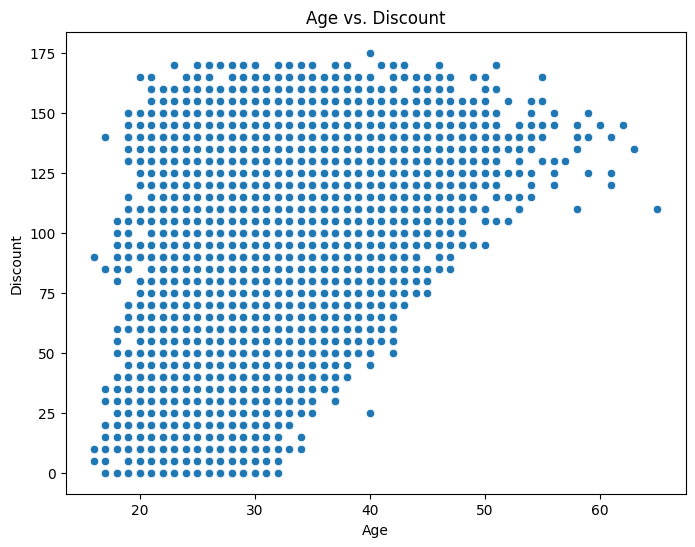

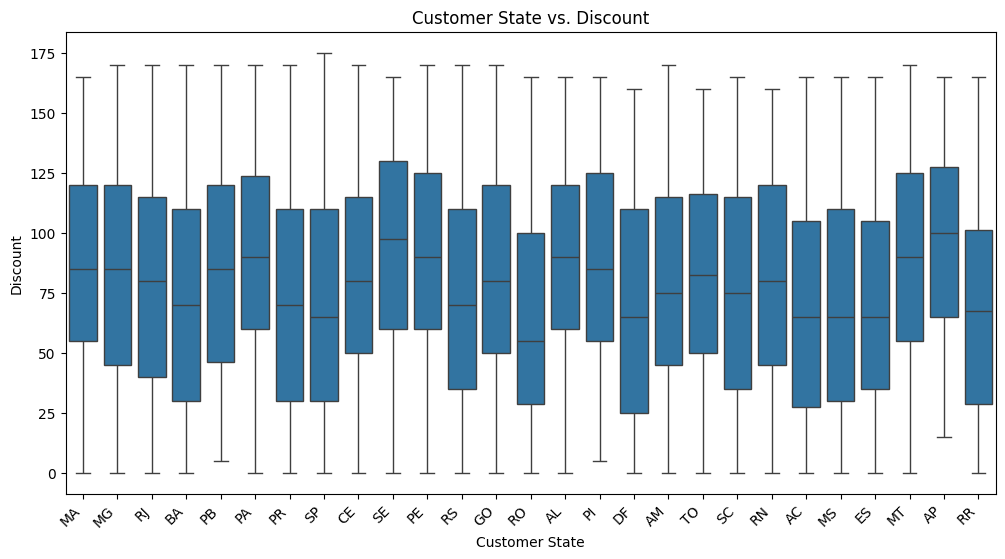

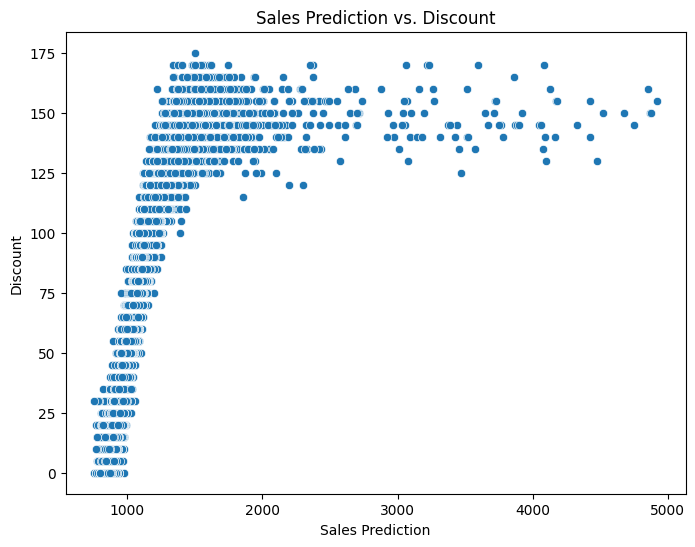

In [28]:
# Plot the relationship between age and discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='discount', data=data)
plt.title('Age vs. Discount')
plt.xlabel('Age')
plt.ylabel('Discount')
plt.show()

# Plot the relationship between customer state and discount
plt.figure(figsize=(12, 6))
sns.boxplot(x='cust_state', y='discount', data=data)
plt.title('Customer State vs. Discount')
plt.xlabel('Customer State')
plt.ylabel('Discount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Plot the relationship between sales prediction and discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sales_prediction', y='discount', data=data)
plt.title('Sales Prediction vs. Discount')
plt.xlabel('Sales Prediction')
plt.ylabel('Discount')
plt.show()

In [29]:
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction,profits
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,125.0,40.06,40,1.0,MA,6,8,1351.024765,43.432
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,75.0,29.52,36,0.0,MG,10,4,1035.580387,31.655
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,50.0,48.08,34,0.0,RJ,7,3,992.401825,50.081
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,10.0,61.64,31,0.0,BA,7,1,919.720735,63.098
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,100.0,34.44,32,1.0,PB,6,6,1176.485681,37.186


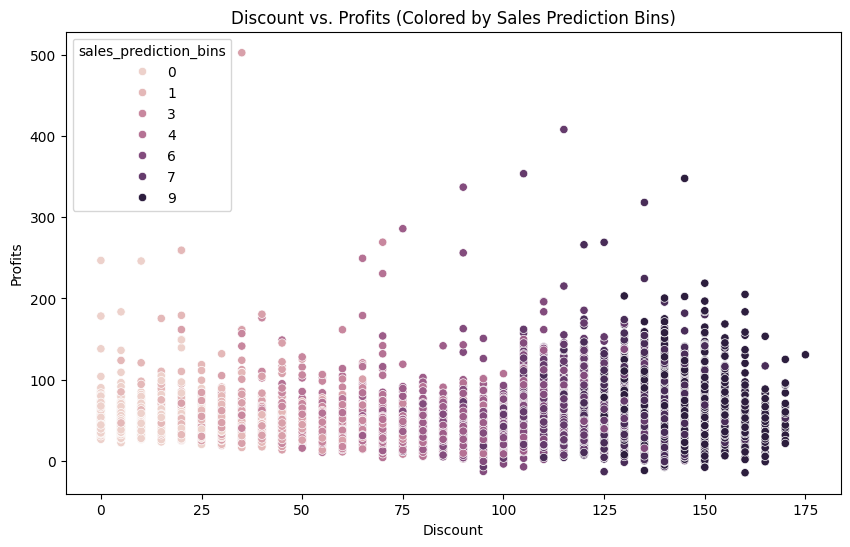

In [30]:
# Plot the relationship between profits and discount with color dimension
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='profits', hue='sales_prediction_bins', data=data)
plt.title('Discount vs. Profits (Colored by Sales Prediction Bins)')
plt.xlabel('Discount')
plt.ylabel('Profits')
plt.show()